# TensorFlow 2.0

Using MNIST example

Make sure you install, if you want to run locally.
```
pip install tensorflow==2.0.0-alpha0 
```

In [1]:
## Imports modules
import tensorflow as tf
import matplotlib.pyplot as plt

## Load data set module

In [2]:
mnist = tf.keras.datasets.mnist

## Load Data Set

If you get any "SSL" certifcate error in mac.
Browse to Applications/Python 3.6 folder and double-click Install Certificates.command

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## Look into data set

In [4]:
print("Total Training samples {} Image size {}x{}".format(x_train.shape[0],x_train.shape[1],x_train.shape[2]))
print("Total Test samples {}.".format(x_test.shape[0]))

Total Training samples 60000 Image size 28x28
Total Test samples 10000.


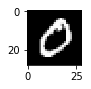

In [6]:
plt.figure(figsize=(1, 1))
plt.imshow(x_train[1], cmap='gray')
plt.show()

## Workflow
- Create a model : Construct the network.
- Compile: Choose the learning algorithm (optimizer) and loss (cost) function.
- Train

## Create the model

In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## Compile the model

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

In [10]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 11s 191us/sample - loss: 0.2203 - accuracy: 0.9343
Epoch 2/5
60000/60000 [==============================] - 10s 169us/sample - loss: 0.0956 - accuracy: 0.9710
Epoch 3/5
60000/60000 [==============================] - 11s 176us/sample - loss: 0.0676 - accuracy: 0.9787
Epoch 4/5
60000/60000 [==============================] - 11s 180us/sample - loss: 0.0528 - accuracy: 0.9831
Epoch 5/5
60000/60000 [==============================] - 10s 171us/sample - loss: 0.0431 - accuracy: 0.9858


In [11]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 88us/sample - loss: 0.0638 - accuracy: 0.9804


[0.06379870177141857, 0.9804]

0


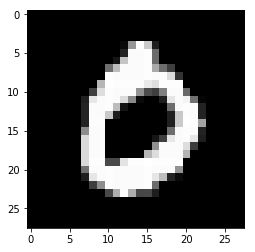

In [15]:
index = 3
predicts = model.predict(x_test[index].reshape(1,28,28))
print(predicts.argmax())
plt.imshow(x_test[index], cmap='gray')